In [52]:
import os
import time
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment


In [53]:
def mp3_to_wav(mp3_path, wav_path):
    AudioSegment.from_mp3(mp3_path).export(wav_path, format="wav")



In [54]:
#Create spectrogram from wav file
def create_spectrogram(wav_path):

    #y is an array representing the frequency of the audio signal at each sample.
    #sr is the sampling rate (samples per second),
    y, sr = librosa.load(wav_path)
    spectrogram = librosa.stft(y)

    #Transforms to decibel scale (logarithmic), which gives more emphasis to amplitude changes in high volumes
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
    return spectrogram_db, sr

In [55]:
def spectrogram_to_numpy(spectrogram_db):
    return np.array(spectrogram_db)


In [56]:
def process_mp3_file(mp3_path, output_dir):
    start_time = time.time()

    ## Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    ## Generate file names for output files
    base_name = os.path.splitext(os.path.basename(mp3_path))[0]
    wav_path = os.path.join(output_dir, f"{base_name}.wav")
    numpy_path = os.path.join(output_dir, f"{base_name}.npy")
    plot_path = os.path.join(output_dir, f"{base_name}_spectrogram.png")

    ## Convert MP3 to WAV
    mp3_to_wav(mp3_path, wav_path)

    ## Create spectrogram
    spectrogram_db, sr = create_spectrogram(wav_path)

    ## Convert spectrogram to NumPy array and save
    np.save(numpy_path, spectrogram_to_numpy(spectrogram_db))

    ## Plot and save spectrogram as an image
    plot_spectrogram(spectrogram_db, sr, 512, plot_path)

    ## Remove temporary WAV file
    os.remove(wav_path)

    ## Calculate processing time
    end_time = time.time()
    processing_time = end_time - start_time

    return numpy_path, plot_path, processing_time




In [57]:
def plot_spectrogram(spectrogram_db, sr, hop_length, output_path):
    plt.figure(figsize=(20, 10))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length)
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

In [58]:
def process_directory(input_dir, output_dir):
    ## Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    total_start_time = time.time()
    file_count = 0

    ## Iterate through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith('.mp3'):
            mp3_path = os.path.join(input_dir, filename)
            ## Process each MP3 file
            numpy_file, plot_file, processing_time = process_mp3_file(mp3_path, output_dir)
            file_count += 1
            ## Print information about processed file
            print(f"Processed {filename}:")
            print(f"  - NumPy array saved to: {numpy_file}")
            print(f"  - Spectrogram plot saved to: {plot_file}")
            print(f"  - Processing time: {processing_time:.2f} seconds")
            print()

    ## Calculate and print total processing statistics
    total_end_time = time.time()
    total_processing_time = total_end_time - total_start_time

    print(f"Total files processed: {file_count}")
    print(f"Total processing time: {total_processing_time:.2f} seconds")
    if file_count > 0:
        print(f"Average processing time per file: {total_processing_time / file_count:.2f} seconds")



In [59]:
input_directory = "/Users/irenegracia/code/jenniferefox/Raw_data/Original Files"
output_directory = "/Users/irenegracia/code/jenniferefox/Raw_data/Output Files"



In [60]:
process_directory(input_directory, output_directory)


Processed 1_3407_3423_ParentingHell908.mp3:
  - NumPy array saved to: /Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3407_3423_ParentingHell908.npy
  - Spectrogram plot saved to: /Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3407_3423_ParentingHell908_spectrogram.png
  - Processing time: 0.38 seconds

Processed 1_3551_3581_NSTAAFjenga.mp3:
  - NumPy array saved to: /Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3551_3581_NSTAAFjenga.npy
  - Spectrogram plot saved to: /Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3551_3581_NSTAAFjenga_spectrogram.png
  - Processing time: 0.28 seconds

Processed 1_3530_3581_NSTAAFjenga.mp3:
  - NumPy array saved to: /Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3530_3581_NSTAAFjenga.npy
  - Spectrogram plot saved to: /Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3530_3581_NSTAAFjenga_spectrogram.png
  - Processing time: 0.27 seconds

Total files processed: 3
Total pro

In [61]:
np_file_1 = np.load('/Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3407_3423_ParentingHell908.npy')
np_file_2 = np.load('/Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3530_3581_NSTAAFjenga.npy')
np_file_3 = np.load('/Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3551_3581_NSTAAFjenga.npy')

In [62]:
np_file_1.shape

(1025, 216)

In [63]:
np_file_2.shape

(1025, 216)

In [64]:
np_file_3.shape

(1025, 216)

In [65]:
import pandas as pd

In [66]:
pd.DataFrame(np_file_1)

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-6.334785,-13.467461,-19.899199,-19.773340,-22.816242,-9.741232,-13.088881,3.215707,3.720767,0.631162,...,-3.612412,-17.643417,-11.008433,-11.950761,-6.434118,2.372319,-0.540077,-20.619030,-15.890819,-10.710321
1,-6.044451,-10.212483,-23.525105,-14.133788,-5.264503,-0.616301,-1.552386,-2.031160,1.188099,-7.587999,...,-5.043970,-9.117270,-15.394850,-11.268712,-3.745291,-0.062112,-2.034199,-11.437372,-12.374220,-5.296450
2,-5.328524,-12.798862,-16.924334,-13.949718,-3.812697,4.532988,4.895164,3.558970,-0.010718,-10.051315,...,-11.729331,-12.749933,-20.634279,-17.064230,-9.559531,-8.737483,-11.515641,-10.709220,-8.505606,-1.682966
3,-3.695121,-8.331683,-15.789233,-7.494415,-12.521860,4.438878,9.572910,5.793208,-4.704637,-9.714983,...,-18.402302,-18.875784,-16.166424,-27.048126,-22.586372,-23.126801,-15.670528,-12.785863,-9.198209,-0.769854
4,-1.181724,-5.082627,-10.891756,-11.281117,-3.358454,5.097870,7.814701,1.830007,-8.567970,-10.687552,...,-11.572639,-35.437199,-14.335915,-19.197586,-16.906893,-10.961346,-9.696344,-40.384834,-9.579706,-0.554868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,...,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-37.403648
1021,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,...,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-37.408100
1022,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,...,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-37.411339
1023,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,...,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-45.202213,-37.413280


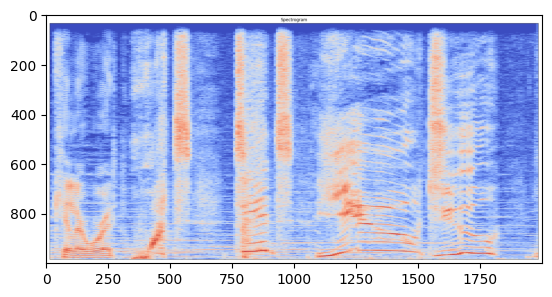

In [67]:
from PIL import Image

image_path_1 = "/Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3407_3423_ParentingHell908_spectrogram.png"
image_1 = Image.open(image_path_1)

plt.imshow(image_1)
plt.show()

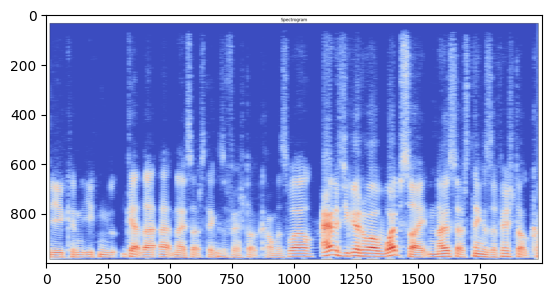

In [68]:
image_path_1 = "/Users/irenegracia/code/jenniferefox/Raw_data/Output Files/1_3530_3581_NSTAAFjenga_spectrogram.png"
image_1 = Image.open(image_path_1)

plt.imshow(image_1)
plt.show()